In [192]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [193]:
# El conjunto de datos "iris"
#https://datos.gob.mx/busca/dataset/nacimientos-ocurridos/resource/4eb5e971-92f1-4f93-88a2-f2ac2f07bb81
filepath = "nacimientos2016.csv"
# Cargamos el conjunto de datos en un dataframe
#all_variables = ['Edo','Edad Madre','No. embarazos','Semanas de gestación','Talla','Peso'] #ojo en el tarjet
all_variables =[]
for x in range(60):
    all_variables.append(x)
    
#all_variables = ['0','1','2. 3','4','Talla','Peso'] #ojo en el tarjet
features = ['Edad Madre','No. embarazos','Semanas de gestación','Talla','Peso']
target = ['Edo']

dfaux = pd.read_csv(filepath,names=all_variables,encoding='latin-1',engine='python')
dfaux2 = dfaux.drop(columns=[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59],axis=1)
dfaux2.head()

,0,1,2,3,4,5
0,AGUASCALIENTES,37.0,2.0,39.0,48.0,3215.0
1,AGUASCALIENTES,19.0,2.0,38.0,50.0,2600.0
2,AGUASCALIENTES,36.0,3.0,40.0,51.0,3205.0
3,AGUASCALIENTES,28.0,1.0,39.0,50.0,3920.0
4,AGUASCALIENTES,36.0,3.0,39.0,51.0,3870.0


In [196]:
dfaux3 = dfaux2.rename(columns={0: "Edo", 1: "Edad Madre",2:"No. embarazos",3:"Semanas de gestación",4:"Talla",5:"Peso"})
df = dfaux3[:1006709]
df

,Edo,Edad Madre,No. embarazos,Semanas de gestación,Talla,Peso
0,AGUASCALIENTES,37.0,2.0,39.0,48.0,3215.0
1,AGUASCALIENTES,19.0,2.0,38.0,50.0,2600.0
2,AGUASCALIENTES,36.0,3.0,40.0,51.0,3205.0
3,AGUASCALIENTES,28.0,1.0,39.0,50.0,3920.0
4,AGUASCALIENTES,36.0,3.0,39.0,51.0,3870.0
...,...,...,...,...,...,...
1006704,MEXICO,24.0,2.0,38.0,48.0,2525.0
1006705,MEXICO,24.0,2.0,39.0,51.0,2815.0
1006706,MEXICO,26.0,3.0,41.0,50.0,3000.0
1006707,MEXICO,25.0,4.0,38.0,49.0,2725.0



Todas las variables deben estar en la misma escala antes de aplicar PCA, de lo contrario una característica con valores grandes dominará el resultado. A continuación utilizo StandardScaler en scikit-learn para estandarizar las características del conjunto de datos en la escala de unidades (media = 0 y varianza = 1).

In [200]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),columns=features)
df_sc.head()

,Edad Madre,No. embarazos,Semanas de gestación,Talla,Peso
0,0.028283,0.010204,0.259259,0.291667,0.308672
1,0.010101,0.010204,0.246914,0.319444,0.246000
2,0.027273,0.020408,0.271605,0.333333,0.307653
3,0.019192,0.000000,0.259259,0.319444,0.380516
4,0.027273,0.020408,0.259259,0.333333,0.375420


Hay 5 features o características en los datos originales. Así que PCA proporcionará el mismo número de componentes principales.

In [201]:

pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),columns=features)
df_pca.head()

,Edad Madre,No. embarazos,Semanas de gestación,Talla,Peso
0,-164.292001,11.065982,-2.589231,0.364321,-0.355665
1,-779.290896,-6.853430,0.274158,-0.638875,-0.137280
2,-174.287464,10.078797,0.470087,1.229518,0.648421
3,540.708989,1.967227,-1.626378,0.136289,-1.270920
4,490.711557,9.996955,-0.550625,0.109989,0.632309


¿Cuáles son las varianzas de cada uno de los componentes principales? El primer componente principal representa una variación del 92.46%, mientras que el segundo, tercero y cuarto representan una variación del 5.3%, 1.71% y 0.51%, respectivamente. Podemos decir que 92.46% + 5.3% = 97.76% de la información es captada por el primer y segundo componente principal. A menudo queremos mantener sólo las características significativas y eliminar las insignificantes. Una regla empírica es mantener los principales componentes principales que capturan la varianza significativa e ignorar los pequeños.

In [202]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.99703519e-01, 2.62418683e-04, 2.74448070e-05, 4.40640799e-06,
       2.21118004e-06])

Podemos graficar el dataframe usando los dos primeros componentes.


In [204]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5','target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,target
0,-164.292001,11.065982,-2.589231,0.364321,-0.355665,AGUASCALIENTES
1,-779.290896,-6.853430,0.274158,-0.638875,-0.137280,AGUASCALIENTES
2,-174.287464,10.078797,0.470087,1.229518,0.648421,AGUASCALIENTES
3,540.708989,1.967227,-1.626378,0.136289,-1.270920,AGUASCALIENTES
4,490.711557,9.996955,-0.550625,0.109989,0.632309,AGUASCALIENTES


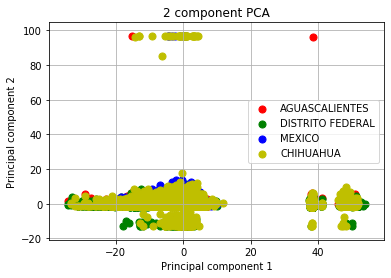

In [210]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal component 1') 
ax.set_ylabel('Principal component 2')
ax.set_title('2 component PCA') 
targets = ['AGUASCALIENTES','DISTRITO FEDERAL','MEXICO','CHIHUAHUA']
colors = ['r', 'g', 'b','y']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC3']
    , df_pca.loc[indicesToKeep, 'PC5']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

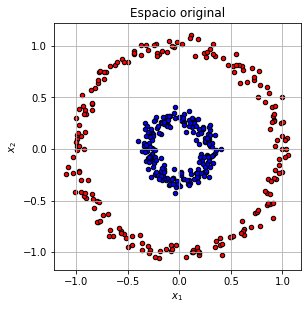

In [211]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

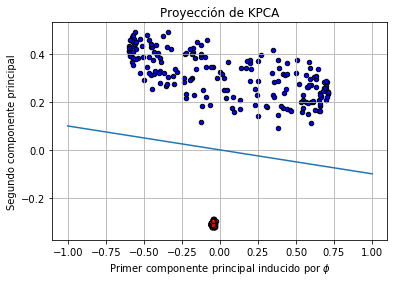

In [212]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()

33